## Shogun Vs Sklearn

Accuracy -  speed - Ease of use

In [1]:
%matplotlib inline
from modshogun import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import time

# Loading Datasets

## Dataset 1 : Size 400 , Dimension 13

In [2]:
house_features = RealFeatures(CSVFile('data/uci/housing/fm_housing.dat')).get_feature_matrix()
house_labels = RegressionLabels(CSVFile('data/uci/housing/housing_label.dat')).get_labels()

house_train = house_features[:,:400]
house_labels_train = house_labels[:400]

house_test = house_features[:,400:]
house_labels_test = house_labels[400:]

shogun_house_train = RealFeatures(house_train)
shogun_house_label_train = RegressionLabels(house_labels_train)

shogun_house_test = RealFeatures(house_test)
shogun_house_label_test = RegressionLabels(house_labels_test)

### Dataset2 : Size 700, Dimensions 1

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


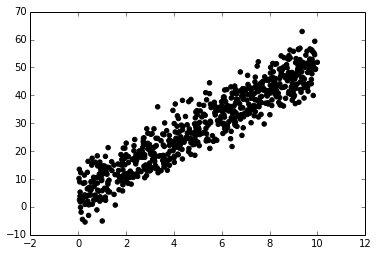

In [3]:
slope= 4.7

x_train = np.random.rand(700)*10
y_train = slope*(x_train)+np.random.randn(700)*5+5
y_true = slope*(x_train)+5
x_test = np.linspace(0,10, 300)
y_test = slope*(x_test)+5

shogun_x_train = RealFeatures(x_train.reshape(1,len(x_train)))
shogun_x_test = RealFeatures(x_test.reshape(1,len(x_test)))
shogun_labels_train = RegressionLabels(y_train)

plt.scatter(x_train, y_train,  color='black')

## Dataset 3 : size 17000 , Dimensions 20

In [4]:
amazon_houses_train = RealFeatures(CSVFile('kc_house_train_data.csv')).get_feature_matrix()

amazon_houses_test = RealFeatures(CSVFile('kc_house_test_data.csv')).get_feature_matrix()

shogun_amazon_houses_train = RealFeatures(amazon_houses_train[3:])
shogun_amazon_houses_label_train = RegressionLabels(amazon_houses_train[2])

shogun_amazon_houses_test = RealFeatures(amazon_houses_test[3:])
shogun_amazon_houses_label_test = RegressionLabels(amazon_houses_test[2])

## Dataset 4 : size 20000, Dimensions 20

In [5]:
amazon_houses = RealFeatures(CSVFile('kc_house_data.csv')).get_feature_matrix()

shogun_amazon_houses_train2 = RealFeatures(amazon_houses[3:,:20000])
shogun_amazon_houses_label_train2 = RegressionLabels(amazon_houses[2,:20000])

shogun_amazon_houses_test2 = RealFeatures(amazon_houses[3:,20000:])
amazon_houses_label_test2 = amazon_houses[2,20000:]

## Linear Ridge Regression

### Dataset 1 : size 400 , Dimensions 13

In [6]:
tau =  0.8
start = time.time()
shogun_regression_2=LinearRidgeRegression(tau,shogun_house_train, shogun_house_label_train)
shogun_regression_2.train()
end = time.time()

house_out = shogun_regression_2.apply(shogun_house_test).get_labels()

print 'Shogun Weights:'
print shogun_regression_2.get_w()
print 'Shogun Bias:'
print shogun_regression_2.get_bias()
print "Shogun RSS: "
print np.mean((house_out - house_labels_test) ** 2)
print "Shogun time:"
print end-start
print "*******"

house_train_inverted = map(list, zip(*house_train))
house_test_inverted = map(list, zip(*house_test))

start = time.time()
sklearn_regression_2 = linear_model.Ridge(0.8)
sklearn_regression_2.fit(house_train_inverted, house_labels_train)
end = time.time()

house_out2 = sklearn_regression_2.predict(house_test_inverted)

print 'Sklearn Weights'
print sklearn_regression_2.coef_
print 'Sklearn Bias'
print sklearn_regression_2.intercept_
print"SKlearn RSS: "
print np.mean((house_out2 - house_labels_test) ** 2)
print "SKlearn time:"
print end-start

Shogun Weights:
[ -2.06414460e-01   4.58363741e-02   3.31130778e-02   1.69269012e+00
  -1.59216381e+00   6.23333130e+00  -4.39179115e-03  -9.38194199e-01
   3.77159719e-01  -1.29459572e-02  -4.47973761e-01   1.13379759e-02
  -4.53751990e-01]
Shogun Bias:
0.0429688129385
Shogun RSS: 
35.7341889222
Shogun time:
0.000273942947388
*******
Sklearn Weights
[ -1.87702465e-01   4.54239489e-02   2.73718821e-02   1.65309323e+00
  -8.72859564e+00   4.90525346e+00  -2.17734848e-03  -1.21309325e+00
   4.69879926e-01  -1.62755324e-02  -7.41442560e-01   7.57794603e-04
  -5.27290791e-01]
Sklearn Bias
23.9655021633
SKlearn RSS: 
35.632283732
SKlearn time:
0.00151586532593


### Dataset2 : Size 700, Dimensions 1

In [7]:
tau = 0.8
start = time.time()
shogun_regression_1 = LinearRidgeRegression(tau,shogun_x_train, shogun_labels_train)
shogun_regression_1.train()
end = time.time()
out = shogun_regression_1.apply(shogun_x_test).get_labels()

print 'Shogun Weights:'
print shogun_regression_1.get_w()
print 'Shogun Bias:'
print shogun_regression_1.get_bias()
print "Shogun RSS: "
print np.mean((out - y_test) ** 2)
print "Shogun time:"
print end-start
print "*************"

start = time.time()
sklearn_regression_1 = linear_model.Ridge(tau)
# Train the model using the training sets
sklearn_regression_1.fit(x_train.reshape(len(x_train),1), y_train)
end = time.time()

out2 = sklearn_regression_1.predict(x_test.reshape(len(x_test),1))
print 'Sklearn Weights'
print sklearn_regression_1.coef_
print 'Sklearn Bias'
print sklearn_regression_1.intercept_
print"SKlearn RSS: "
print np.mean((out2 - y_test) ** 2)
print "SKlearn time:"
print end-start

Shogun Weights:
[ 5.38399911]
Shogun Bias:
1.03416651048
Shogun RSS: 
4.22280779342
Shogun time:
0.000149011611938
*************
Sklearn Weights
[ 4.74345728]
Sklearn Bias
4.4176065262
SKlearn RSS: 
0.149146240572
SKlearn time:
0.000537872314453


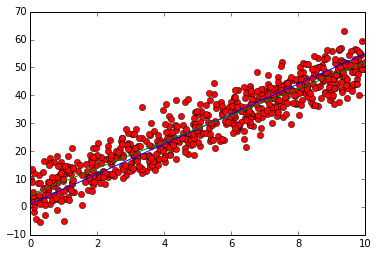

In [8]:
_=plt.plot(x_train,y_train, 'ro')
_=plt.plot(x_test,out, color='blue')
_=plt.plot(x_test, out2, color='green')

### Dataset 3 : Size 17000, Dimensions 20

In [9]:
tau = 0.8
start = time.time()
shogun_regression_3 = LinearRidgeRegression(tau,shogun_amazon_houses_train, shogun_amazon_houses_label_train)
shogun_regression_3.train()
end = time.time()
out = shogun_regression_3.apply(shogun_amazon_houses_test).get_labels()

print 'Shogun Weights:'
print shogun_regression_3.get_w()
print 'Shogun Bias:'
print shogun_regression_3.get_bias()
print "Shogun RSS: "
print np.mean((out - amazon_houses_test[2]) ** 2)
print "Shogun time:"
print end-start
print "*************"

amazon_houses_train_inverted = map(list, zip(*amazon_houses_train[3:]))
amazon_houses_test_inverted = map(list, zip(*amazon_houses_test[3:]))

start = time.time()
sklearn_regression_3 = linear_model.Ridge(tau)
# Train the model using the training sets
sklearn_regression_3.fit(amazon_houses_train_inverted, amazon_houses_train[2])
end = time.time()

out3 = sklearn_regression_3.predict(amazon_houses_test_inverted)
print 'Sklearn Weights'
print sklearn_regression_3.coef_
print 'Sklearn Bias'
print sklearn_regression_3.intercept_
print"SKlearn RSS: "
print np.mean((out3 - amazon_houses_test[2]) ** 2)
print "SKlearn time:"
print end-start

Shogun Weights:
[ -4.01088413e+04   4.99629512e+04   1.09720029e+02   7.11706467e-02
   0.00000000e+00   6.09282186e+05   4.91617025e+04   2.30797377e+04
   1.12069968e+05   6.21659259e+01   4.73938277e+01  -3.24025262e+03
   1.45678002e+01   0.00000000e+00   4.85609152e+05   1.42858783e+05
   9.49465027e+00  -5.74613945e-01]
Shogun Bias:
-27.9209516097
Shogun RSS: 
41248183251.8
Shogun time:
0.00254201889038
*************
Sklearn Weights
[ -4.00807046e+04   4.98633489e+04   1.09682627e+02   7.23542563e-02
   0.00000000e+00   6.09258655e+05   4.91232207e+04   2.31710966e+04
   1.11918075e+05   6.23257263e+01   4.73539529e+01  -3.23073762e+03
   1.46575825e+01   0.00000000e+00   4.86571905e+05   1.39465488e+05
   9.71484153e+00  -5.72395515e-01]
Sklearn Bias
-478960.380416
SKlearn RSS: 
41272940326.5
SKlearn time:
0.0416100025177


### Dataset 4 : Size 20000, Dimensions 20

In [10]:
tau = 0.8
start = time.time()
shogun_regression_4 = LinearRidgeRegression(tau,shogun_amazon_houses_train2, shogun_amazon_houses_label_train2)
shogun_regression_4.train()
end = time.time()
out = shogun_regression_4.apply(shogun_amazon_houses_test2).get_labels()

print 'Shogun Weights:'
print shogun_regression_4.get_w()
print 'Shogun Bias:'
print shogun_regression_4.get_bias()
print "Shogun RSS: "
print np.mean((out - amazon_houses_label_test2) ** 2)
print "Shogun time:"
print end-start
print "*******************************"

amazon_houses_train_inverted2 = map(list, zip(*amazon_houses[3:,:20000]))
amazon_houses_test_inverted2 = map(list, zip(*amazon_houses[3:,20000:]))

start = time.time()
sklearn_regression_3 = linear_model.Ridge(tau)
# Train the model using the training sets
sklearn_regression_3.fit(amazon_houses_train_inverted2, amazon_houses[2,:20000])
end = time.time()

out3 = sklearn_regression_3.predict(amazon_houses_test_inverted2)
print 'Sklearn Weights'
print sklearn_regression_3.coef_
print 'Sklearn Bias'
print sklearn_regression_3.intercept_
print"SKlearn RSS: "
print np.mean((out3 - amazon_houses_label_test2) ** 2)
print "SKlearn time:"
print end-start

Shogun Weights:
[ -3.43227191e+04   4.59770867e+04   1.07453210e+02   4.07689865e-02
   0.00000000e+00   5.71267802e+05   5.19443681e+04   2.58333496e+04
   1.02739105e+05   6.43896347e+01   4.17063197e+01  -3.35955709e+03
   1.52685086e+01   0.00000000e+00   4.79527507e+05   1.38422864e+05
   2.48791158e+01  -5.60798678e-01]
Shogun Bias:
-25.1057902166
Shogun RSS: 
50314205355.5
Shogun time:
0.00424814224243
*******************************
Sklearn Weights
[ -3.43004496e+04   4.58868510e+04   1.07160637e+02   4.19929288e-02
   0.00000000e+00   5.71206835e+05   5.19049426e+04   2.59190097e+04
   1.02599645e+05   6.47941158e+01   4.19143742e+01  -3.34911430e+03
   1.53685238e+01   0.00000000e+00   4.80502296e+05   1.34919846e+05
   2.50739432e+01  -5.58546466e-01]
Sklearn Bias
-494760.202
SKlearn RSS: 
50231584226.5
SKlearn time:
0.0496380329132


## Lasso Regression

### Dataset 1 - size 500 - Dimensions 13

In [11]:
start = time.time()
shogun_lasso_regression1=LeastAngleRegression(lasso=True)
shogun_lasso_regression1.set_labels(shogun_house_label_train)
shogun_lasso_regression1.train(shogun_house_train)
end = time.time()

shogun_lasso_out1 = shogun_lasso_regression1.apply(shogun_house_test).get_labels()

print 'Shogun Weights:'
print shogun_lasso_regression1.get_w()
print 'Shogun Bias:'
print shogun_lasso_regression1.get_bias()
print "Shogun RSS: "
print np.mean((shogun_lasso_out1 - house_labels_test) ** 2)
print "Shogun time:"
print end-start
print "****************************"


start = time.time()
sklearn_lasso_regression1 = linear_model.Lasso()
sklearn_lasso_regression1.fit(house_train_inverted, house_labels_train)
end = time.time()

sklearn_lasso_out1 = sklearn_lasso_regression1.predict(house_test_inverted)

print 'Sklearn Weights'
print sklearn_lasso_regression1.coef_
print 'Sklearn Bias'
print sklearn_lasso_regression1.intercept_
print"SKlearn RSS: "
print np.mean((sklearn_lasso_out1 - house_labels_test) ** 2)
print "SKlearn time:"
print end-start

Shogun Weights:
[ -2.07803677e-01   4.54598411e-02   3.80540419e-02   1.73671197e+00
  -2.48316331e+00   6.29751631e+00  -3.96993936e-03  -9.44676797e-01
   3.76983123e-01  -1.26846090e-02  -4.50995418e-01   1.11214277e-02
  -4.47627389e-01]
Shogun Bias:
0.0437820044396
Shogun RSS: 
36.048335804
Shogun time:
0.00175619125366
****************************
Sklearn Weights
[-0.06672593  0.04867329 -0.          0.         -0.          1.8287023
  0.02662454 -0.73154672  0.36464622 -0.01739047 -0.6456581   0.00861184
 -0.78298032]
Sklearn Bias
34.3629652813
SKlearn RSS: 
21.6686771582
SKlearn time:
0.00342583656311


comments: no feature were set to zero at Shogun !!

### Dataset 2 - size 700 - Dimensions 1

In [12]:
start = time.time()
shogun_lasso_regression2=LeastAngleRegression(lasso=True)
shogun_lasso_regression2.set_labels(shogun_labels_train)
shogun_lasso_regression2.train(shogun_x_train)
end = time.time()

shogun_lasso_out2 = shogun_lasso_regression2.apply(shogun_x_test).get_labels()

print 'Shogun Weights:'
print shogun_lasso_regression2.get_w()
print 'Shogun Bias:'
print shogun_lasso_regression2.get_bias()
print "Shogun RSS: "
print np.mean((shogun_lasso_out2 - y_test) ** 2)
print "Shogun time:"
print end-start
print "****************************"


start = time.time()
sklearn_lasso_regression2 = linear_model.Lasso()
sklearn_lasso_regression2.fit(x_train.reshape(len(x_train),1), y_train)
end = time.time()

sklearn_lasso_out2 = sklearn_lasso_regression2.predict(x_test.reshape(len(x_test),1))

print 'Sklearn Weights'
print sklearn_lasso_regression2.coef_
print 'Sklearn Bias'
print sklearn_lasso_regression2.intercept_
print"SKlearn RSS: "
print np.mean((sklearn_lasso_out2 - y_test) ** 2)
print "SKlearn time:"
print end-start

Shogun Weights:
[ 5.38416803]
Shogun Bias:
1.0332742924
Shogun RSS: 
4.22479853565
Shogun time:
0.000211000442505
****************************
Sklearn Weights
[ 4.62681836]
Sklearn Bias
5.03371116283
SKlearn RSS: 
0.155283011256
SKlearn time:
0.000534772872925


### Dataset 3 - Size 17000 , Dimensions 20

In [13]:
# start = time.time()
# shogun_lasso_regression3=LeastAngleRegression(lasso=True)
# shogun_lasso_regression3.set_labels(shogun_amazon_houses_label_train)
# shogun_lasso_regression3.train(shogun_amazon_houses_train)
# end = time.time()

# shogun_lasso_out3 = shogun_lasso_regression3.apply(shogun_amazon_houses_test).get_labels()

# print 'Shogun Weights:'
# print shogun_lasso_regression3.get_w()
# print 'Shogun Bias:'
# print shogun_lasso_regression3.get_bias()
# print "Shogun RSS: "
# print np.mean((shogun_lasso_out3 - amazon_houses_test[2]) ** 2)
# print "Shogun time:"
# print end-start
# print "****************************"


start = time.time()
sklearn_lasso_regression3 = linear_model.Lasso()
sklearn_lasso_regression3.fit(amazon_houses_train_inverted, amazon_houses_train[2])
end = time.time()

sklearn_lasso_out3 = sklearn_lasso_regression3.predict(amazon_houses_test_inverted)

print 'Sklearn Weights'
print sklearn_lasso_regression3.coef_
print 'Sklearn Bias'
print sklearn_lasso_regression3.intercept_
print"SKlearn RSS: "
print np.mean((sklearn_lasso_out3 - amazon_houses_test[2]) ** 2)
print "SKlearn time:"
print end-start

Sklearn Weights
[ -4.00454440e+04   4.98559078e+04   2.91637519e+02   7.26722147e-02
   0.00000000e+00   6.13587741e+05   4.89486529e+04   2.31817705e+04
   1.11911643e+05  -1.19678699e+02  -1.34622221e+02  -3.23014814e+03
   1.46138395e+01   0.00000000e+00   4.87843919e+05   1.39969539e+05
   9.70615103e+00  -5.72512861e-01]
Sklearn Bias
-478986.483544
SKlearn RSS: 
41278461472.5
SKlearn time:
0.982949972153


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


comment : Dead Kernel

# LARS

### Dataset 1 : size 400 , Dimension 13

In [14]:
start = time.time()
shogun_lars_regression1=LeastAngleRegression()
shogun_lars_regression1.set_labels(shogun_house_label_train)
shogun_lars_regression1.train(shogun_house_train)
end = time.time()

shogun_lars_out1 = shogun_lars_regression1.apply(shogun_house_test).get_labels()

print 'Shogun Weights:'
print shogun_lars_regression1.get_w()
print 'Shogun Bias:'
print shogun_lars_regression1.get_bias()
print "Shogun RSS: "
print np.mean((shogun_lars_out1 - house_labels_test) ** 2)
print "Shogun time:"
print end-start
print "****************************"


start = time.time()
sklearn_lars_regression1 = linear_model.Lars()
sklearn_lars_regression1.fit(house_train_inverted, house_labels_train)
end = time.time()

sklearn_lars_out1 = sklearn_lars_regression1.predict(house_test_inverted)

print 'Sklearn Weights'
print sklearn_lars_regression1.coef_
print 'Sklearn Bias'
print sklearn_lars_regression1.intercept_
print"SKlearn RSS: "
print np.mean((sklearn_lars_out1 - house_labels_test) ** 2)
print "SKlearn time:"
print end-start

Shogun Weights:
[ -2.07803677e-01   4.54598411e-02   3.80540419e-02   1.73671197e+00
  -2.48316331e+00   6.29751631e+00  -3.96993936e-03  -9.44676797e-01
   3.76983123e-01  -1.26846090e-02  -4.50995418e-01   1.11214277e-02
  -4.47627389e-01]
Shogun Bias:
0.0437820044396
Shogun RSS: 
36.048335804
Shogun time:
0.000604867935181
****************************
Sklearn Weights
[ -1.91246374e-01   4.42289967e-02   5.52207977e-02   1.71631351e+00
  -1.49957220e+01   4.88773025e+00   2.60921031e-03  -1.29480799e+00
   4.84787214e-01  -1.54006673e-02  -8.08795026e-01  -1.29230427e-03
  -5.17953791e-01]
Sklearn Bias
28.6725995909
SKlearn RSS: 
37.8937785996
SKlearn time:
0.0105271339417


### Dataset 2 : Size 700 ,Dimensions 1

In [15]:
start = time.time()
shogun_lars_regression2=LeastAngleRegression()
shogun_lars_regression2.set_labels(shogun_labels_train)
shogun_lars_regression2.train(shogun_x_train)
end = time.time()

shogun_lars_out2 = shogun_lars_regression2.apply(shogun_x_test).get_labels()

print 'Shogun Weights:'
print shogun_lars_regression2.get_w()
print 'Shogun Bias:'
print shogun_lars_regression2.get_bias()
print "Shogun RSS: "
print np.mean((shogun_lars_out2 - y_test) ** 2)
print "Shogun time:"
print end-start
print "****************************"


start = time.time()
sklearn_lars_regression2 = linear_model.Lars()
sklearn_lars_regression2.fit(x_train.reshape(len(x_train),1), y_train)
end = time.time()

sklearn_lars_out2 = sklearn_lasso_regression2.predict(x_test.reshape(len(x_test),1))

print 'Sklearn Weights'
print sklearn_lars_regression2.coef_
print 'Sklearn Bias'
print sklearn_lars_regression2.intercept_
print"SKlearn RSS: "
print np.mean((sklearn_lars_out2 - y_test) ** 2)
print "SKlearn time:"
print end-start

Shogun Weights:
[ 5.38416803]
Shogun Bias:
1.0332742924
Shogun RSS: 
4.22479853565
Shogun time:
0.000208139419556
****************************
Sklearn Weights
[ 4.74409304]
Sklearn Bias
4.4142483601
SKlearn RSS: 
0.155283011256
SKlearn time:
0.000586032867432


Comment : lars and lasso were exactly the same.

## KRR - Regression

### Dataset 1 : Size 400 , Dimension 13

In [20]:
linearkernel1=LinearKernel(shogun_house_train, shogun_house_train)

start = time.time()
shogun_krr = KernelRidgeRegression(tau,linearkernel1,shogun_house_label_train)
shogun_krr.train()
end = time.time()
shogun_out_krr1 = shogun_krr.apply(shogun_house_test)

print "Shogun RSS: "
print np.mean((shogun_out_krr1 - house_labels_test) ** 2)
print "Shogun time:"
print end-start
print "*************"

from sklearn.kernel_ridge import KernelRidge
start = time.time()
sklearn_krr = KernelRidge(tau,kernel='linear')
sklearn_krr.fit(house_train_inverted, house_labels_train)
end = time.time()
sklearn_out_krr1 = sklearn_krr.predict(house_test_inverted)

print"SKlearn RSS: "
print np.mean((sklearn_out_krr1 - house_labels_test) ** 2)
print "SKlearn time:"
print end-start

Shogun RSS: 
35.5095726824
Shogun time:
0.21177482605
*************
SKlearn RSS: 
35.509572658
SKlearn time:
0.600630044937


### Dataset 2 : size 700 , Dimension 1

In [21]:
linearkernel2=LinearKernel(shogun_x_train, shogun_x_train)

start = time.time()
shogun_krr2 = KernelRidgeRegression(tau,linearkernel2,shogun_labels_train)
shogun_krr2.train()
end = time.time()
shogun_out_krr2 = shogun_krr2.apply(shogun_x_test)

print "Shogun RSS: "
print np.mean((shogun_out_krr2 - y_test) ** 2)
print "Shogun time:"
print end-start
print "*************"

from sklearn.kernel_ridge import KernelRidge
start = time.time()
sklearn_krr2 = KernelRidge(tau,kernel='linear')
sklearn_krr2.fit(x_train.reshape(len(x_train),1), y_train)
end = time.time()
sklearn_out_krr2 = sklearn_krr2.predict(x_test.reshape(len(x_test),1))

print"SKlearn RSS: "
print np.mean((sklearn_out_krr2 - y_test) ** 2)
print "SKlearn time:"
print end-start

Shogun RSS: 
6.42128276263
Shogun time:
0.10447716713
*************
SKlearn RSS: 
6.42128276263
SKlearn time:
0.0515711307526


### Dataset 3 : Size 17000 , Dimension 20

In [22]:
linearkernel3=LinearKernel(shogun_amazon_houses_train, shogun_amazon_houses_train)

start = time.time()
shogun_krr3 = KernelRidgeRegression(tau,linearkernel3,shogun_amazon_houses_label_train)
shogun_krr3.train()
end = time.time()
shogun_out_krr3 = shogun_krr3.apply(shogun_amazon_houses_test)

print "Shogun RSS: "
print np.mean((shogun_out_krr3 - amazon_houses_test[2]) ** 2)
print "Shogun time:"
print end-start
print "*************"

from sklearn.kernel_ridge import KernelRidge
start = time.time()
sklearn_krr3 = KernelRidge(tau,kernel='linear')
sklearn_krr3.fit(amazon_houses_train_inverted, amazon_houses_train[2])
end = time.time()
sklearn_out_krr3 = sklearn_krr3.predict(amazon_houses_test_inverted)

print"SKlearn RSS: "
print np.mean((sklearn_out_krr3 - amazon_houses_test[2]) ** 2)
print "SKlearn time:"
print end-start

Shogun RSS: 
41241784943.1
Shogun time:
161.315326929
*************
SKlearn RSS: 
41248064454.3
SKlearn time:
201.892426968


### Dataset 4 : Size 20000 , Dimension 20

In [23]:
linearkernel4=LinearKernel(shogun_amazon_houses_train2, shogun_amazon_houses_train2)

start = time.time()
shogun_krr4 = KernelRidgeRegression(tau,linearkernel4,shogun_amazon_houses_label_train2)
shogun_krr4.train()
end = time.time()
shogun_out_krr4 = shogun_krr4.apply(shogun_amazon_houses_test2)

print "Shogun RSS: "
print np.mean((shogun_out_krr4 - amazon_houses_label_test2) ** 2)
print "Shogun time:"
print end-start
print "*************"

from sklearn.kernel_ridge import KernelRidge
start = time.time()
sklearn_krr4 = KernelRidge(tau,kernel='linear')
sklearn_krr4.fit(amazon_houses_train_inverted2, amazon_houses[2,:20000])
end = time.time()
sklearn_out_krr4 = sklearn_krr4.predict(amazon_houses_test_inverted2)

print"SKlearn RSS: "
print np.mean((sklearn_out_krr4 - amazon_houses_label_test2) ** 2)
print "SKlearn time:"
print end-start

Shogun RSS: 
50305256962.9
Shogun time:
248.716552019
*************
SKlearn RSS: 
50324034982.4
SKlearn time:
657.826957941
